<a href="https://colab.research.google.com/github/eze-hong/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EC%B6%9C%EC%84%9D%EA%B3%BC%EC%A0%9C_%ED%99%8D%EC%9D%B4%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-2

1.   Python을 사용하여 API를 호출하는 코드를 작성
2.   2015년 1월부터 2024년 12월까지의 개인 유형의 현년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집하는 프로그램을 작성
3. API 호출 성공을 확인할 수 있는 실행 결과를 캡처하여 첨부


In [96]:
import requests
import json
import pandas as pd
import numpy as np

params = {
    'KEY' : '626b6c4a5873656f36336e756f4b6f',
    'TYPE' : 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX' : '1',
    'END_INDEX' : '100',
}
## 데이터 수집
def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

responses = []

for year_month in get_year_months():
    year = year_month[:4]
    mon = year_month[4:]
    url = f'http://openapi.seoul.go.kr:8088/626b6c4a5873656f36336e756f4b6f/json/energyUseDataSummaryInfo/1/7/{year}/{mon}'
    response = requests.get(url, params=params)
    data = response.json().get('energyUseDataSummaryInfo', {})
    result = data.get('RESULT', {})

    if result.get('CODE') == 'INFO-000' :
        rows = data.get('row', [])
        개인_row = [r for r in rows if r['MM_TYPE'] == '개인']
        if(len(개인_row)!=0) :
            responses.append([{'YEAR': d['YEAR'], 'MON' : d['MON'], 'MM_TYPE' : d['MM_TYPE'], 'EUS' : d['EUS'], 'GUS' : d['GUS'], 'WUS' : d['WUS'], 'HUS' : d['HUS']} for d in 개인_row])
        else :
            responses.append([{'YEAR': year, 'MON' : mon, 'MM_TYPE' : '개인', 'EUS' : 0, 'GUS' : 0, 'WUS' : 0, 'HUS' : 0}])

if(len(responses)!=0):
    print("api 호출 성공")
    print(responses)
else :
    print("api 호출 실패")

api 호출 성공
[[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}], [{'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}], [{'YEAR': '2015', 'MON': '03', 'MM_TYPE': '개인', 'EUS': '175215719', 'GUS': '49984873', 'WUS': '12655474.249', 'HUS': '13826348.508'}], [{'YEAR': '2015', 'MON': '04', 'MM_TYPE': '개인', 'EUS': '183891769', 'GUS': '37306841', 'WUS': '12954773.246', 'HUS': '5836002.885'}], [{'YEAR': '2015', 'MON': '05', 'MM_TYPE': '개인', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}], [{'YEAR': '2015', 'MON': '06', 'MM_TYPE': '개인', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}], [{'YEAR': '2015', 'MON': '07', 'MM_TYPE': '개인', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}], [{'YEAR': '2015', 'MON': '08', 'MM_TYPE': '개인', 'EU

문제 2
1. 수집한 JSON 형태의 데이터를 pandas DataFrame으로 변환하고, 데이터의 기본 정보를 출력 하는 코드와 실행 결과를 첨부
2. 연도별, 계절별 분석을 위해 날짜 컬럼을 활용하여 연도(year)와 계절(season) 컬럼을 추가하 는 전처리 코드를 작성하고, 변환 결과를 확인할 수 있는 출력 결과를 첨부하시오.
※ 계절 구분: 봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월)

In [101]:
#문제2-1
flat_responses = [d for sublist in responses for d in sublist]
df = pd.DataFrame(flat_responses)
print("------df------")
print(df)
print()
print("------df.info------")
df.info()
print()
print("------df.describe------")
print(df.describe(include='all'))

------df------
     YEAR MON MM_TYPE        EUS       GUS           WUS           HUS
0    2015  01      개인  193784708  59133720  12819757.886  22740838.937
1    2015  02      개인  189974230  56487358  12656888.218  18793320.213
2    2015  03      개인  175215719  49984873  12655474.249  13826348.508
3    2015  04      개인  183891769  37306841  12954773.246   5836002.885
4    2015  05      개인  177289769  22060892  13086734.214   1320895.801
..    ...  ..     ...        ...       ...           ...           ...
115  2024  08      개인  463971328   7072251    15873544.6    130082.263
116  2024  09      개인  409872908   5729131    15143321.6   3420507.136
117  2024  10      개인  282268119   8233421    15297669.9   2695491.396
118  2024  11      개인  257927956  17418221    14678672.5   8836296.454
119  2024  12      개인  134828126  42103424     7326853.6   1513199.277

[120 rows x 7 columns]

------df.info------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (to

In [104]:
#문제2-2
def getSeason(x) :
    mon = int(x['MON'])
    if 3<= mon <=5 : return 'Spring'
    elif 6<= mon <=8 : return 'Summer'
    elif 9<= mon <=11 : return 'Autumn'
    else : return 'Winter'

df['SEASON'] = df.apply(getSeason, axis=1)
print("------SEASON 칼럼 추가------")
print(df)

------SEASON 칼럼 추가------
     YEAR MON MM_TYPE        EUS         GUS           WUS           HUS  \
0    2015  01      개인  193784708  59133720.0  1.281976e+07  2.274084e+07   
1    2015  02      개인  189974230  56487358.0  1.265689e+07  1.879332e+07   
2    2015  03      개인  175215719  49984873.0  1.265547e+07  1.382635e+07   
3    2015  04      개인  183891769  37306841.0  1.295477e+07  5.836003e+06   
4    2015  05      개인  177289769  22060892.0  1.308673e+07  1.320896e+06   
..    ...  ..     ...        ...         ...           ...           ...   
115  2024  08      개인  463971328   7072251.0  1.587354e+07  1.300823e+05   
116  2024  09      개인  409872908   5729131.0  1.514332e+07  3.420507e+06   
117  2024  10      개인  282268119   8233421.0  1.529767e+07  2.695491e+06   
118  2024  11      개인  257927956  17418221.0  1.467867e+07  8.836296e+06   
119  2024  12      개인  134828126  42103424.0  7.326854e+06  1.513199e+06   

     SEASON  
0    Winter  
1    Winter  
2    Spring  
3    S

문제 3
1. 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화하고, 그래프에 자신의 학번 뒤 4자리를 제목에 포함하여 저장하시오. (예: "연도별 에너지 사용 총액 변 화 - 1234") 시각화 코드와 생성된 그래프를 첨부하시오.
2. 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시하시 오. 시각화 코드와 생성된 그래프를 첨부하시오.

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,403 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
##위 둘 실행하고 세션다시

             EUS           GUS           WUS           HUS      TOTALUSE
YEAR                                                                    
2015  2307639393  3.300242e+08  1.623915e+08  9.976170e+07  2.899817e+09
2016  2624619777  3.692934e+08  1.639438e+08  1.020500e+08  3.259907e+09
2017  2725339685  4.089969e+08  1.629142e+08  1.120190e+08  3.409270e+09
2018  2943309193  4.591039e+08  1.633478e+08  1.164322e+08  3.682193e+09
2019  2983329866  4.430955e+08  1.688443e+08  1.954659e+08  3.790736e+09
2020  3147833086  4.417741e+08  1.775491e+08  1.390113e+08  3.906168e+09
2021  3357544310  4.445310e+08  1.799091e+08  1.231913e+08  4.105176e+09
2022  3353529606  4.628330e+08  1.762838e+08  1.399096e+08  4.132556e+09
2023  3400871711  4.153717e+08  1.740865e+08  1.304122e+08  4.120742e+09
2024  3490467636  3.439990e+08  1.689265e+08  1.293406e+08  4.132734e+09


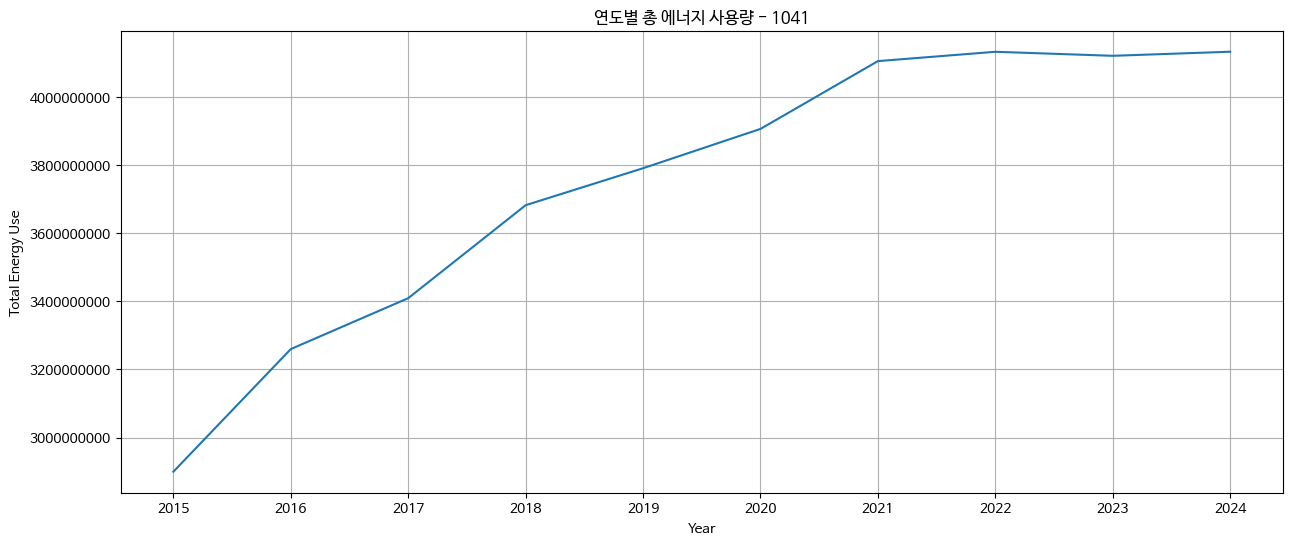

In [105]:
#문제3-1
## 숫자로 변환
df[['YEAR','EUS', 'GUS', 'WUS', 'HUS']] = df[['YEAR','EUS', 'GUS', 'WUS', 'HUS']].apply(pd.to_numeric)
##결측치 처리
df[['EUS','GUS','WUS','HUS']] = df[['EUS','GUS','WUS','HUS']].replace(0, np.nan)
df[['EUS','GUS','WUS','HUS']] = df[['EUS','GUS','WUS','HUS']].interpolate(method='linear')

## 연도별로 묶기
yearData = df.groupby('YEAR')[['EUS', 'GUS', 'WUS', 'HUS']].sum()

## 연도별 총 사용량
yearData['TOTALUSE'] = yearData.sum(axis=1)

print(yearData)

plt.figure(figsize=(15, 6))
plt.plot(yearData.index, yearData['TOTALUSE'])
plt.xticks(yearData.index)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.title("연도별 총 에너지 사용량 - 1041")
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.show()

<bound method NDFrame.head of SEASON
Spring    45274814.080167
Summer     11435931.47619
Autumn    16171200.854545
WInter    63551318.318182
Name: GUS, dtype: object>


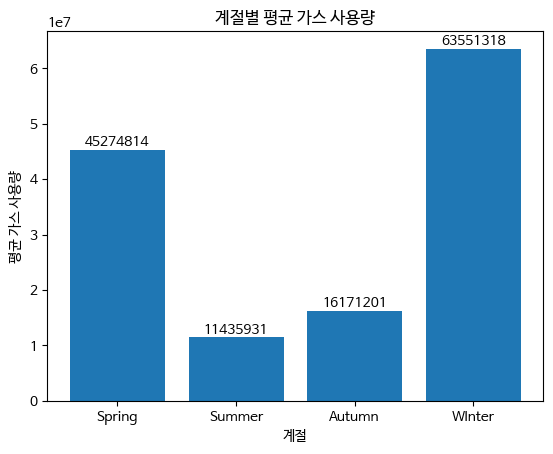

In [108]:
#문제3-2
#계절별 가스 사용량 평균 막대(수치표시) 그래프
season_gas_data['gus_sum'] = df.groupby('SEASON')['GUS'].mean()
season_gas_data = season_gas_data[['Spring','Summer', 'Autumn', 'WInter']]
print(season_gas_data.head)

bars = plt.bar(season_gas_data.index, season_gas_data)
plt.title("계절별 평균 가스 사용량")
plt.xlabel("계절")
plt.ylabel("평균 가스 사용량")
plt.bar_label(bars, fmt='%.f')
plt.show()


문제 4
1. 연도별 에너지 사용량 변화에서 나타나는 주요 트렌드를 찾아 분석하고, 그 원인을 추론하여 200자 이내로 설명하시오.

연도별 에너지 사용량은 2015년부터 2021년도까지 계속해서 상승세를 보이다가 그 후부터는 비슷한 수준의 사용량을 보인다. 데이터는 전기, 가스, 수도와 지역난방의 총합이고 개인의 사용량이므로 산업의 구조적인 변화보다는 개인의 에너지 의존도가 높아졌다고 할 수 있다. 21년 이후로는 에너지 소비 트렌드가 크게 변화하지 않았다고 추론할 수 있다.